In [ ]:
!pip install langgraph langchain langchain_community langchainhub ipykernel langchain-groq IPython


: 

In [ ]:
from typing import Annotated
from typing import TypedDict



In [ ]:
from langgraph.graph import StateGraph

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
from google.colab import userdata
userdata.get('GROQ_API_KEY')

'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'

In [ ]:
llm = ChatGroq(model="llama3-70b-8192" , api_key="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")

In [ ]:
llm.invoke("hi how are you?").content

"Hi! I'm just a language model, I don't have feelings or emotions like humans do, so I don't have good or bad days. However, I'm always happy to chat with you and help with any questions or topics you'd like to discuss! How about you? How's your day going so far?"

In [ ]:
llm.invoke("hi how are you?")

AIMessage(content="Hi! I'm doing well, thanks for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm always happy to chat with you and help with any questions or topics you'd like to discuss. How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 15, 'total_tokens': 78, 'completion_time': 0.18, 'prompt_time': 0.000322416, 'queue_time': 0.24798465, 'total_time': 0.180322416}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-e0190ea1-b2d9-498b-b1ce-667746ff719e-0', usage_metadata={'input_tokens': 15, 'output_tokens': 63, 'total_tokens': 78})

In [ ]:
# Define a state object
class State(TypedDict):
    input: str  # Ensure this matches the expected key

In [ ]:
def function1(state):
  llm = ChatGroq(model="llama3-70b-8192" , api_key="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")
  user_input = state["input"]  # Extract the actual string input
  response= llm.invoke(user_input).content
  return {"input": response}

In [ ]:
def function2(state):
    upper_string = state["input"].upper()
    return {"input": upper_string}

In [ ]:


workflow = StateGraph(State)  # Make sure the graph knows about State


In [ ]:
# create object
workflow = StateGraph(State)

In [ ]:
workflow.add_node("function1",function1)
workflow.add_node("function2",function2)


In [ ]:
workflow.add_edge("function1", "function2")

In [ ]:
workflow.set_entry_point("function1")
workflow.set_finish_point("function2")

In [ ]:
app= workflow.compile()

In [ ]:
result = app.invoke({"input": "tell me about New York"})
print(result["input"].replace("\\n", "\n"))  # Ensure proper new lines


NEW YORK! THE EMPIRE STATE, THE CITY THAT NEVER SLEEPS, THE BIG APPLE... THERE'S SO MUCH TO SAY ABOUT THIS ICONIC CITY. HERE'S A BRIEF OVERVIEW:

** GEOGRAPHY AND CLIMATE **

NEW YORK IS LOCATED IN THE NORTHEASTERN UNITED STATES, IN THE STATE OF NEW YORK. IT'S SITUATED ON THE ATLANTIC COAST, WHERE THE HUDSON RIVER MEETS THE ATLANTIC OCEAN. THE CITY HAS A HUMID CONTINENTAL CLIMATE, WITH COLD WINTERS AND HOT, HUMID SUMMERS.

** NEIGHBORHOODS AND BOROUGHS **

NEW YORK CITY IS COMPOSED OF FIVE BOROUGHS:

1. **MANHATTAN**: THE FINANCIAL HUB, HOME TO ICONIC LANDMARKS LIKE TIMES SQUARE, CENTRAL PARK, AND THE EMPIRE STATE BUILDING.
2. **BROOKLYN**: A TRENDY, ARTSY BOROUGH WITH A THRIVING MUSIC AND FOOD SCENE.
3. **QUEENS**: THE MOST ETHNICALLY DIVERSE COUNTY IN THE US, WITH A VIBRANT ARTS AND CULTURAL SCENE.
4. **THE BRONX**: KNOWN FOR ITS BASEBALL TEAM, THE YANKEES, AND THE BRONX ZOO.
5. **STATEN ISLAND**: A RESIDENTIAL BOROUGH WITH A MORE SUBURBAN FEEL.

** ATTRACTIONS AND LANDMARKS **

NEW 

In [ ]:
result = app.invoke({"input": "steps to make maggi"})
print(result["input"].replace("\\n", "\n"))  # Ensure proper new lines


A CLASSIC! HERE ARE THE SIMPLE STEPS TO MAKE A DELICIOUS MAGGI NOODLES:

**INGREDIENTS:**

* 1 PACKET OF MAGGI NOODLES
* 2 CUPS OF WATER
* 1 TABLESPOON OF VEGETABLE OIL (OPTIONAL)
* SALT TO TASTE
* OPTIONAL: VEGETABLES (E.G., PEAS, CARROTS, ONIONS), SPICES (E.G., CHILI FLAKES, CURRY POWDER), OR PROTEIN (E.G., EGGS, CHICKEN) TO ADD FLAVOR AND NUTRITION

**INSTRUCTIONS:**

1. **BOIL WATER**: BRING 2 CUPS OF WATER TO A BOIL IN A LARGE POT OR KETTLE.
2. **ADD MAGGI NOODLES**: OPEN THE PACKET OF MAGGI NOODLES AND ADD THE CONTENTS TO THE BOILING WATER.
3. **ADD OIL (OPTIONAL)**: IF YOU WANT TO ADD SOME EXTRA FLAVOR, ADD 1 TABLESPOON OF VEGETABLE OIL TO THE POT.
4. **WAIT FOR 2-3 MINUTES**: LET THE NOODLES COOK FOR 2-3 MINUTES OR UNTIL THEY ARE SLIGHTLY TENDER.
5. **ADD FLAVOR MAKER**: OPEN THE FLAVOR MAKER PACKET THAT COMES WITH THE MAGGI NOODLES AND ADD THE CONTENTS TO THE POT.
6. **STIR WELL**: STIR THE NOODLES AND FLAVOR MAKER MIXTURE WELL TO ENSURE THE FLAVORS ARE EVENLY DISTRIBUTED.
7. 

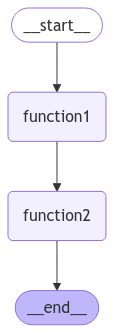

In [ ]:

from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)
